# **CARGA DE LA BASE DE DATOS**

In [38]:
# Importamos las paqueterías que ocuparemos

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

In [39]:
# Código para omitir los warnings

import warnings
warnings.filterwarnings('ignore')

In [40]:
# Cargamos la base de datos desde Drive

# ID del archivo de Google Drive
file_id = "1Sc3L35SbDqhRXM8yqZKxAtk1gZ2YZUxM"

# Construir la URL de descarga directa
url = f"https://drive.google.com/uc?export=download&id=1Sc3L35SbDqhRXM8yqZKxAtk1gZ2YZUxM"

# Cargar el archivo CSV desde Google Drive
df = pd.read_csv(url)

# Visualizar los primeros 5 registros
df.head()

,Country,Country Code,Year from,Year to,Age from,Age to,Gender,Salivary Gland Cancer,Tongue Cancer,Lip Cancer,Mouth Cancer,Source
0,Algeria,DZ,1990,1993,NaN,NaN,female,0.1,0.0,0.1,0.2,Parkin D.M. et al. Cancer Incidence in Five Co...
1,Algeria,DZ,1990,1993,NaN,NaN,male,2.3,0.2,0.6,0.5,Parkin D.M. et al. Cancer Incidence in Five Co...
2,Algeria,DZ,1990,1993,5.0,9.0,female,0.0,0.0,0.0,0.0,Parkin D.M. et al. Cancer Incidence in Five Co...
3,Algeria,DZ,1990,1993,5.0,9.0,male,0.0,0.0,0.3,0.0,Parkin D.M. et al. Cancer Incidence in Five Co...
4,Algeria,DZ,1990,1993,15.0,19.0,female,0.0,0.0,0.0,0.0,Parkin D.M. et al. Cancer Incidence in Five Co...


In [41]:
# Eliminamos la columna "Source" ya que no aporta información a nuestro análisis

df.drop(columns=['Source'], inplace=True)

# **ANÁLISIS EXPLORATORIO**

In [42]:
# Modificamos los nombres de las columnas

new_column_names = {
    'Country': 'country',
    'Country Code': 'country_code',
    'Year from': 'year_from',
    'Year to': 'year_to',
    'Age from': 'age_from',
    'Age to': 'age_to',
    'Gender': 'gender',
    'Salivary Gland Cancer': 'salivary_gland_cancer(per100000)',
    'Tongue Cancer': 'tongue_cancer(per100000)',
    'Lip Cancer': 'lip_cancer(per100000)',
    'Mouth Cancer': 'mouth_cancer(per100000)'
}
df = df.rename(columns=new_column_names)

In [43]:
# Imprimimos la información de las variables

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1733 entries, 0 to 1732
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   country                           1733 non-null   object 
 1   country_code                      1733 non-null   object 
 2   year_from                         1733 non-null   int64  
 3   year_to                           1733 non-null   int64  
 4   age_from                          1611 non-null   float64
 5   age_to                            1497 non-null   float64
 6   gender                            1733 non-null   object 
 7   salivary_gland_cancer(per100000)  1733 non-null   float64
 8   tongue_cancer(per100000)          1733 non-null   float64
 9   lip_cancer(per100000)             1733 non-null   float64
 10  mouth_cancer(per100000)           1733 non-null   float64
dtypes: float64(6), int64(2), object(3)
memory usage: 149.1+ KB


In [ ]:
# Se agrega una columna con los intervalos de edad
#df['age_interval'] = df.apply(lambda row: f"{row['age_from']}-{row['age_to']}", axis=1)
#df.head()

,country,country_code,year_from,year_to,age_from,age_to,gender,salivary_gland_cancer(per100000),tongue_cancer(per100000),lip_cancer(per100000),mouth_cancer(per100000),age_interval
0,Algeria,DZ,1990,1993,NaN,NaN,female,0.1,0.0,0.1,0.2,nan-nan
1,Algeria,DZ,1990,1993,NaN,NaN,male,2.3,0.2,0.6,0.5,nan-nan
2,Algeria,DZ,1990,1993,5.0,9.0,female,0.0,0.0,0.0,0.0,5.0-9.0
3,Algeria,DZ,1990,1993,5.0,9.0,male,0.0,0.0,0.3,0.0,5.0-9.0
4,Algeria,DZ,1990,1993,15.0,19.0,female,0.0,0.0,0.0,0.0,15.0-19.0


In [ ]:
# Imprimimos los valores únicos de las variables junto al número de registros
def print_unique_values(df, column_name):
    unique_values = df[column_name].value_counts().to_frame()
    unique_values = unique_values.rename(columns = {"count" : "Conteo"})
    print(f'== Valores únicos de la variable "{column_name}" ==\n')
    print(f'{unique_values}\n')

print_unique_values(df, "country")
print_unique_values(df, "year_to")
print_unique_values(df, "year_from")
print_unique_values(df, "age_to")
print_unique_values(df, "age_from")
print_unique_values(df, "gender")

== Valores únicos de la variable "country" ==

                          Conteo
country                         
United States of America      75
United Kingdom                69
India                         63
Germany                       62
Kuwait                        51
New Zealand                   38
Canada                        38
Czech Republic                38
Singapore                     38
Belarus                       36
Japan                         36
Israel                        36
Croatia                       36
Denmark                       36
Philippines                   36
Netherlands                   36
Finland                       36
Hong Kong                     34
Latvia                        34
China                         34
Sweden                        34
Slovakia                      32
Spain                         32
Costa Rica                    32
Colombia                      32
Norway                        32
Peru                         

In [ ]:
# Número de países con los que contamos
len(df["country"].value_counts())

52

In [46]:
# Imprimir estadísticos de las variables

def print_statistics(df, column_name):
  print(f'==', column_name,'==\n')
  print(f'{("Estadístico"):25}   Valor')
  print(f'---------------------------------------')
  print(f'{("Máximo"):25} | {df[column_name].max():.2f}')
  print(f'{("Mínimo"):25} | {df[column_name].min():.2f}')
  print(f'{("Media"):25} | {df[column_name].mean():.2f}')
  print(f'{("Desvest"):25} | {df[column_name].std():.2f}')
  print(f'\n')

print_statistics(df, 'age_to')
print_statistics(df, 'age_from')
print_statistics(df, 'year_to')
print_statistics(df, 'year_from')
print_statistics(df, 'salivary_gland_cancer(per100000)')
print_statistics(df, 'tongue_cancer(per100000)')
print_statistics(df, 'lip_cancer(per100000)')
print_statistics(df, 'mouth_cancer(per100000)')


== age_to ==

Estadístico                 Valor
---------------------------------------
Máximo                    | 84.00
Mínimo                    | 4.00
Media                     | 48.30
Desvest                   | 21.56


== age_from ==

Estadístico                 Valor
---------------------------------------
Máximo                    | 85.00
Mínimo                    | 0.00
Media                     | 46.90
Desvest                   | 22.89


== year_to ==

Estadístico                 Valor
---------------------------------------
Máximo                    | 1994.00
Mínimo                    | 1991.00
Media                     | 1992.09
Desvest                   | 0.48


== year_from ==

Estadístico                 Valor
---------------------------------------
Máximo                    | 1992.00
Mínimo                    | 1986.00
Media                     | 1988.25
Desvest                   | 0.96


== salivary_gland_cancer(per100000) ==

Estadístico                 Valor
--------

In [67]:
# Imprimir los promedios globales

print(f'== Promedios globales ==\n')
print(f'{("Tipo de cáncer"):25}   Promedio ()')
print(f'---------------------------------------')
print(f'{("Glándula salival"):25} | {df["salivary_gland_cancer(per100000)"].mean():.4f}')
print(f'{("Lengua"):25} | {df["tongue_cancer(per100000)"].mean():.4f}')
print(f'{("Labio"):25} | {df["lip_cancer(per100000)"].mean():.4f}')
print(f'{("Boca"):25} | {df["mouth_cancer(per100000)"].mean():.4f}')

== Promedios globales ==

Tipo de cáncer              Promedio ()
---------------------------------------
Glándula salival          | 1.5499
Lengua                    | 3.4564
Labio                     | 3.4852
Boca                      | 4.5282


In [70]:
# Imprimir los promedios por país de cáncer de glándula salival

# Calcula el promedio de incidencia por país
salivary_mean = df["salivary_gland_cancer(per100000)"].groupby(df['country']).mean()

# Imprime el resultado de cada país con f-string
for country, mean_value in salivary_mean.items():
    print(f'{("Glándula salival"):25} | {country:10} | {mean_value:.4f}')

Glándula salival          | Algeria    | 0.4000
Glándula salival          | Argentina  | 2.2192
Glándula salival          | Australia  | 2.2333
Glándula salival          | Austria    | 1.8767
Glándula salival          | Belarus    | 1.3167
Glándula salival          | Brazil     | 1.7967
Glándula salival          | Canada     | 1.7947
Glándula salival          | China      | 1.0676
Glándula salival          | Colombia   | 1.1969
Glándula salival          | Costa Rica | 0.8313
Glándula salival          | Croatia    | 2.4778
Glándula salival          | Czech Republic | 2.1342
Glándula salival          | Denmark    | 1.2139
Glándula salival          | Ecuador    | 1.6933
Glándula salival          | Estonia    | 1.5900
Glándula salival          | Finland    | 1.5611
Glándula salival          | France     | 2.4667
Glándula salival          | French Polynesia | 0.3350
Glándula salival          | Germany    | 1.7081
Glándula salival          | Hong Kong  | 1.7765
Glándula salival          | Ic

In [71]:
# Imprimir los promedios por país de cáncer de lengua

# Calcula el promedio de incidencia por país
salivary_mean = df["tongue_cancer(per100000)"].groupby(df['country']).mean()

# Imprime el resultado de cada país con f-string
for country, mean_value in salivary_mean.items():
    print(f'{("Lengua"):25} | {country:10} | {mean_value:.4f}')

Lengua                    | Algeria    | 0.5250
Lengua                    | Argentina  | 6.0115
Lengua                    | Australia  | 4.0133
Lengua                    | Austria    | 2.3033
Lengua                    | Belarus    | 2.4000
Lengua                    | Brazil     | 10.0967
Lengua                    | Canada     | 3.2474
Lengua                    | China      | 1.5412
Lengua                    | Colombia   | 4.1344
Lengua                    | Costa Rica | 1.8281
Lengua                    | Croatia    | 3.5583
Lengua                    | Czech Republic | 2.1474
Lengua                    | Denmark    | 1.9278
Lengua                    | Ecuador    | 0.8400
Lengua                    | Estonia    | 3.0233
Lengua                    | Finland    | 1.9750
Lengua                    | France     | 9.3500
Lengua                    | French Polynesia | 5.3500
Lengua                    | Germany    | 3.9548
Lengua                    | Hong Kong  | 3.7029
Lengua                    | I

In [72]:
# Imprimir los promedios por país de cáncer de boca

# Calcula el promedio de incidencia por país
salivary_mean = df["mouth_cancer(per100000)"].groupby(df['country']).mean()

# Imprime el resultado de cada país con f-string
for country, mean_value in salivary_mean.items():
    print(f'{("Boca"):25} | {country:10} | {mean_value:.4f}')

Boca                      | Algeria    | 0.5450
Boca                      | Argentina  | 4.6154
Boca                      | Australia  | 3.6233
Boca                      | Austria    | 6.2033
Boca                      | Belarus    | 3.4833
Boca                      | Brazil     | 15.4133
Boca                      | Canada     | 4.3053
Boca                      | China      | 2.5500
Boca                      | Colombia   | 5.3594
Boca                      | Costa Rica | 1.4812
Boca                      | Croatia    | 3.7694
Boca                      | Czech Republic | 2.0447
Boca                      | Denmark    | 4.5944
Boca                      | Ecuador    | 1.5000
Boca                      | Estonia    | 4.2600
Boca                      | Finland    | 2.5139
Boca                      | France     | 12.7233
Boca                      | French Polynesia | 8.8500
Boca                      | Germany    | 4.2419
Boca                      | Hong Kong  | 3.4559
Boca                      | 

In [73]:
# Imprimir los promedios por país de cáncer de labio

# Calcula el promedio de incidencia por país
salivary_mean = df["lip_cancer(per100000)"].groupby(df['country']).mean()

# Imprime el resultado de cada país con f-string
for country, mean_value in salivary_mean.items():
    print(f'{("Labio"):25} | {country:10} | {mean_value:.4f}')

Labio                     | Algeria    | 1.5050
Labio                     | Argentina  | 5.0500
Labio                     | Australia  | 22.6767
Labio                     | Austria    | 0.6133
Labio                     | Belarus    | 9.8944
Labio                     | Brazil     | 3.8400
Labio                     | Canada     | 5.9079
Labio                     | China      | 0.2882
Labio                     | Colombia   | 0.8938
Labio                     | Costa Rica | 2.0687
Labio                     | Croatia    | 5.7833
Labio                     | Czech Republic | 3.3053
Labio                     | Denmark    | 4.8111
Labio                     | Ecuador    | 0.1833
Labio                     | Estonia    | 4.6933
Labio                     | Finland    | 7.5889
Labio                     | France     | 1.0800
Labio                     | French Polynesia | 0.0000
Labio                     | Germany    | 2.8097
Labio                     | Hong Kong  | 0.1765
Labio                     | I

# **LIMPIEZA**

In [ ]:
# Verificamos la existencia de valores nulos de cada variable

df.isnull().sum()

In [ ]:
# Para imputar los valores nulos de la edad, se revisa si existe una diferencia por país en cuanto a las edades

df['age_from'].groupby(df['country']).mean() #Se pensaría que Yugoslavia es el país con valores nulos en las edades

In [ ]:
df['age_from'].mean() #Promedio de las edades de todo el dataset

In [ ]:
# Lista de paises con valores nulos

df[df['age_from'].isnull()]["country"].value_counts()

In [ ]:
# Para imputar los valores nulos de la edad, se revisa si además de existir una diferencia por país, también existe por género.

df['age_from'].groupby([df['country'],df['gender']]).mean()

**NOTA:** Imputamos los valores nulos con el promedio de edad por país, ya que no se observa una diferencia en las edades por género.

In [ ]:
# Imputamos los valores nulos de las edades usando el promedio

df_mean = df.copy()
mean_age_f = df['age_from'].groupby(df['country']).mean()
mean_age_t = df['age_to'].groupby(df['country']).mean()
df_mean['age_from'].fillna(df_mean['age_from'].mean(), inplace=True)
df_mean['age_to'].fillna(df_mean['age_to'].mean(), inplace=True)
df_mean.isnull().sum() #aqui es para verificar que ya no hay NaNs

In [47]:
# Simplificamos la base agrupando sólo por país y género

grouped_df = df.groupby(['country', 'gender']).agg({
    'salivary_gland_cancer(per100000)': 'mean',
    'tongue_cancer(per100000)': 'mean',
    'lip_cancer(per100000)': 'mean',
    'mouth_cancer(per100000)': 'mean'
}).reset_index()
#Añadimos una nueva columna llamada "total_cancer" para juntar la prevalencia total de cancer
grouped_df['total_cancer'] = (grouped_df['salivary_gland_cancer(per100000)'] +
                              grouped_df['tongue_cancer(per100000)'] +
                              grouped_df['lip_cancer(per100000)'] +
                              grouped_df['mouth_cancer(per100000)'])
grouped_df

,country,gender,salivary_gland_cancer(per100000),tongue_cancer(per100000),lip_cancer(per100000),mouth_cancer(per100000),total_cancer
0,Algeria,female,0.430000,0.180000,0.100000,0.330000,1.040000
1,Algeria,male,0.370000,0.870000,2.910000,0.760000,4.910000
2,Argentina,female,1.730769,1.192308,4.161538,1.015385,8.100000
3,Argentina,male,2.707692,10.830769,5.938462,8.215385,27.692308
4,Australia,female,0.640000,2.606667,9.293333,4.466667,17.006667
...,...,...,...,...,...,...,...
99,Viet Nam,male,1.000000,1.335714,0.214286,1.685714,4.235714
100,Yugoslavia,female,0.400000,0.300000,0.800000,0.300000,1.800000
101,Yugoslavia,male,0.600000,3.000000,3.900000,2.300000,9.800000
102,Zimbabwe,female,0.785714,9.492857,0.407143,2.528571,13.214286


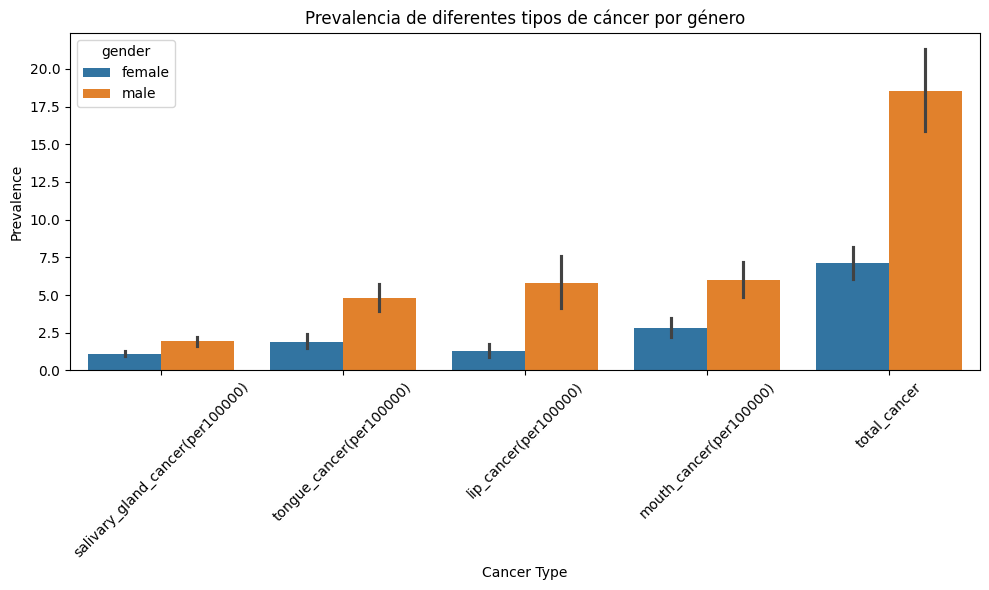

In [48]:
# Gráficamos la prevalencia de los distintos tipos de cáncer por género

plt.figure(figsize=(10, 6))
df_melted = grouped_df.melt(id_vars=["country", "gender"],
                    value_vars=['salivary_gland_cancer(per100000)', 'tongue_cancer(per100000)',
                                'lip_cancer(per100000)', 'mouth_cancer(per100000)', 'total_cancer'],
                    var_name='Cancer Type', value_name='Prevalence')

sns.barplot(x='Cancer Type', y='Prevalence', hue='gender', data=df_melted)
plt.title('Prevalencia de diferentes tipos de cáncer por género')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

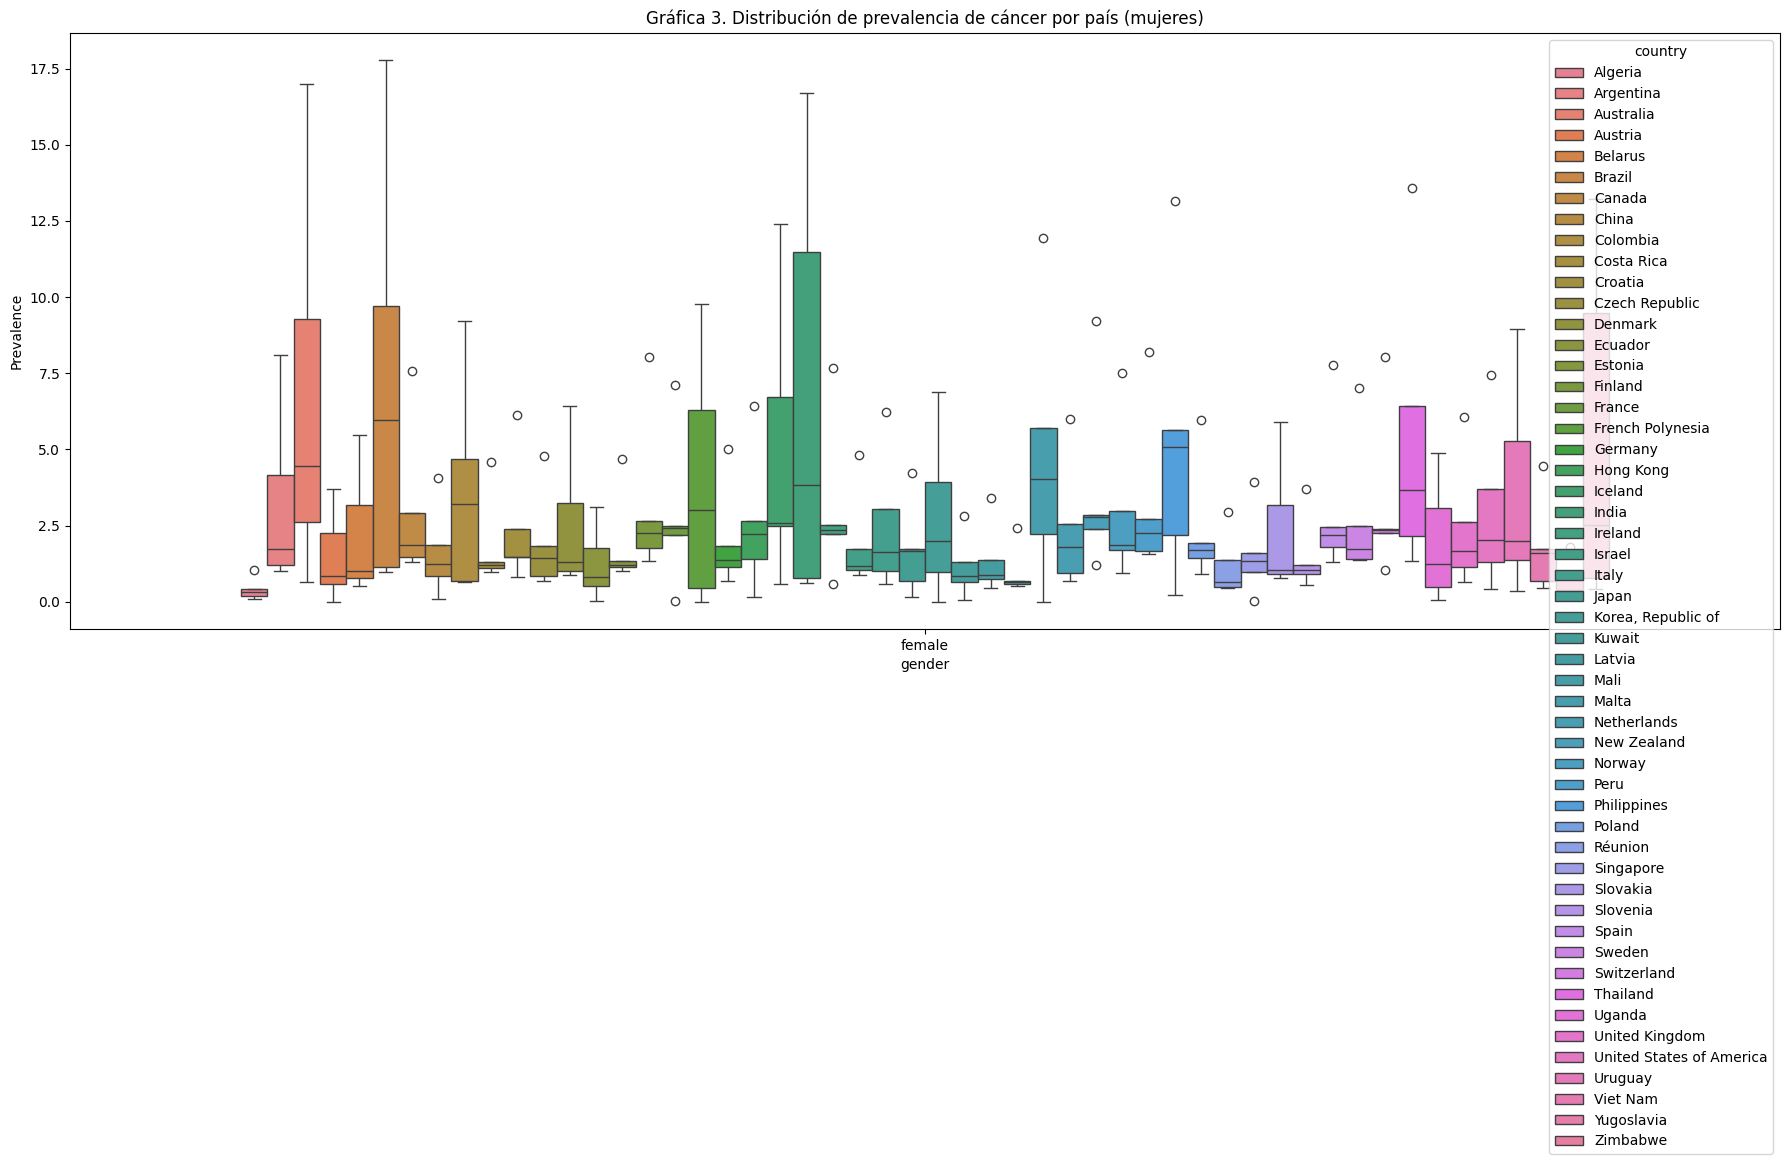

In [49]:
  # Gráfico de caja para ver la distribución de cánceres por país en mujeres

plt.figure(figsize=(18, 10))
sns.boxplot(x='gender', y='Prevalence', hue='country', data=df_melted[df_melted['gender'] == 'female'])
plt.title('Gráfica 3. Distribución de prevalencia de cáncer por país (mujeres)')
#plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

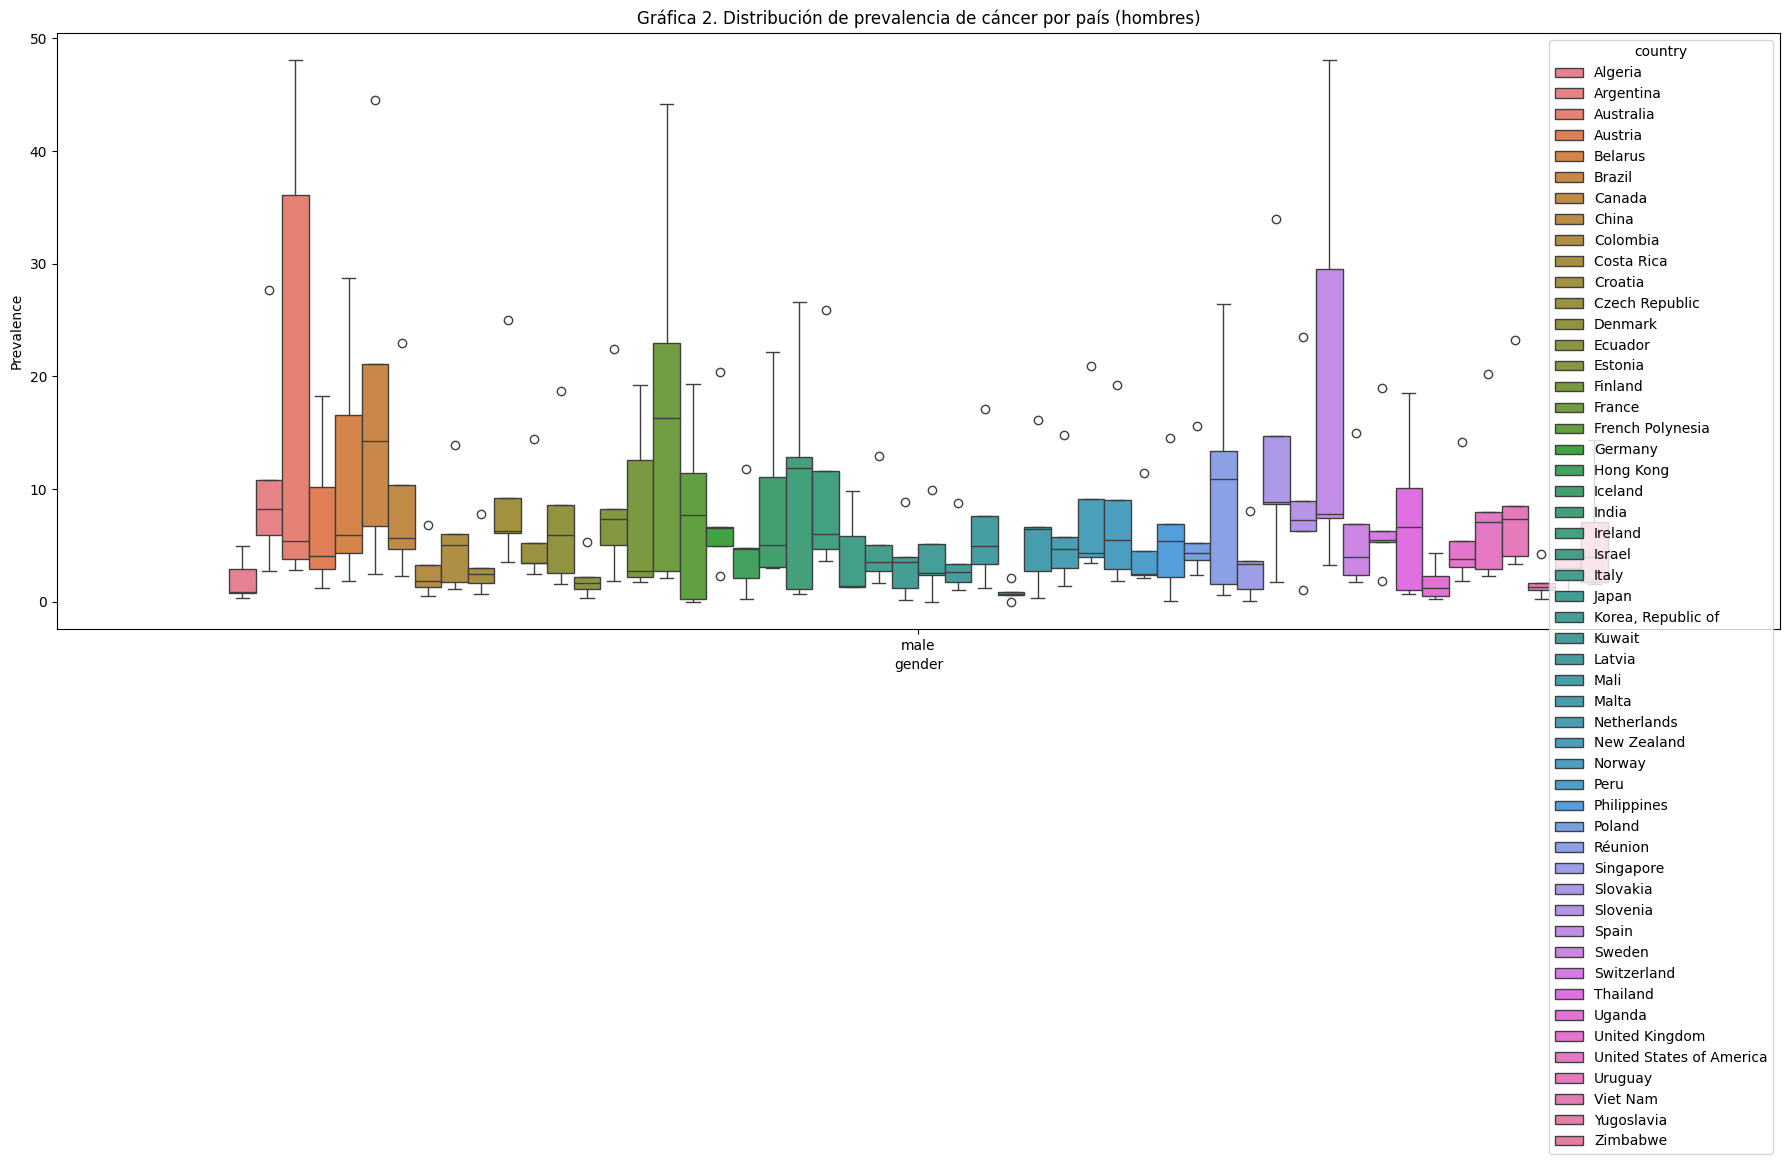

In [50]:
  # Gráfico de caja para ver la distribución de cánceres por país en hombres
plt.figure(figsize=(18, 10))
sns.boxplot(x='gender', y='Prevalence', hue='country', data=df_melted[df_melted['gender'] == 'male'])
plt.title('Gráfica 2. Distribución de prevalencia de cáncer por país (hombres)')
#plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

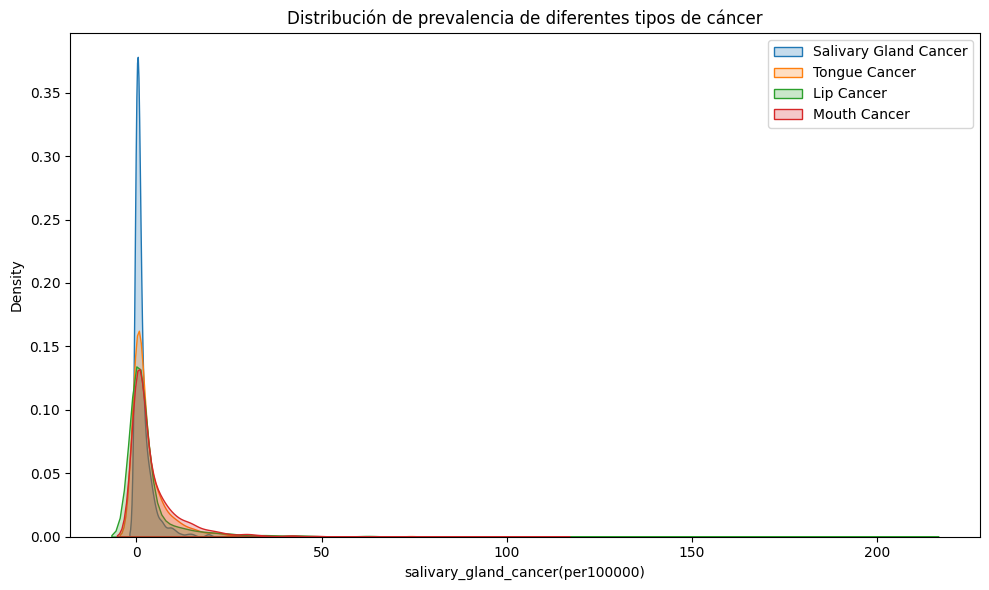

In [51]:
# Gráfico de densidad para visualizar la distribución de cada tipo de cáncer

plt.figure(figsize=(10, 6))
sns.kdeplot(df['salivary_gland_cancer(per100000)'], shade=True, label='Salivary Gland Cancer')
sns.kdeplot(df['tongue_cancer(per100000)'], shade=True, label='Tongue Cancer')
sns.kdeplot(df['lip_cancer(per100000)'], shade=True, label='Lip Cancer')
sns.kdeplot(df['mouth_cancer(per100000)'], shade=True, label='Mouth Cancer')
plt.title('Distribución de prevalencia de diferentes tipos de cáncer')
plt.legend()
plt.tight_layout()
plt.show()

In [52]:
# Mapa de arbol para el cancer de glandula salivar

fig = px.treemap(
    grouped_df,
    path=['country', 'gender'],
    values='salivary_gland_cancer(per100000)'
)

fig.show()

In [53]:
# Mapa de arbol para el cancer de lengua

fig = px.treemap(
    grouped_df,
    path=['country', 'gender'],
    values='tongue_cancer(per100000)'
)

fig.show()

In [54]:
# Mapa de arbol para el cancer de labio

fig = px.treemap(
    grouped_df,
    path=['country', 'gender'],
    values='lip_cancer(per100000)'
)

fig.show()

In [55]:
# Mapa de arbol para el cancer de boca

fig = px.treemap(
    grouped_df,
    path=['country', 'gender'],
    values='mouth_cancer(per100000)'
)

fig.show()

In [56]:
#Mapa de arbol para el cancer total

fig = px.treemap(
    grouped_df,
    path=['country', 'gender'],
    values='total_cancer'
)

fig.show()

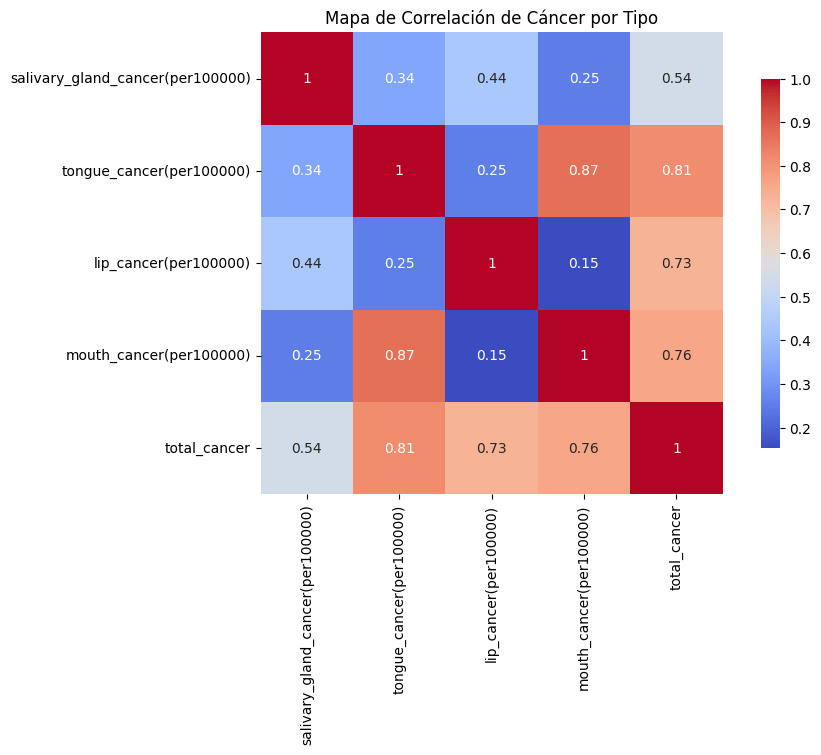

In [57]:
# Matriz de correlación de las variables

correlation_data = grouped_df[['salivary_gland_cancer(per100000)',
                                 'tongue_cancer(per100000)',
                                 'lip_cancer(per100000)',
                                 'mouth_cancer(per100000)',
                                 'total_cancer']]

# Calculamos la matriz de correlación
correlation_matrix = correlation_data.corr()

# Establecemos el tamaño de la figura
plt.figure(figsize=(10, 6))

# Creamos el heatmap
sns.heatmap(correlation_matrix,
             annot=True,   # Muestra los valores de correlación en el heatmap
             cmap='coolwarm',  # Puedes cambiar el color del mapa
             square=True,
             cbar_kws={"shrink": .8})

# Títulos y etiquetas
plt.title('Mapa de Correlación de Cáncer por Tipo')
plt.show()

# **MODELO**

In [59]:
# Aplicaremos KMeans para agrupar nuestros datos de acuerdo al país y el género y comprobar si influyen en la prevalencia del cáncer total

# One-Hot Encoding para 'país' y 'género' para codificar nuestras variables
encoder = OneHotEncoder()
encoded_data = encoder.fit_transform(grouped_df[['country', 'gender']]).toarray()

# Combinar datos codificados con la columna 'num_de_personas' y se guarda en features
features = pd.concat([pd.DataFrame(encoded_data), grouped_df[['total_cancer']]], axis=1)

# Asegurarse de que todos los nombres de columnas sean cadenas
features.columns = features.columns.astype(str)

features

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,total_cancer
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.040000
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.910000
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,8.100000
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,27.692308
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,17.006667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,4.235714
100,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.800000
101,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,9.800000
102,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,13.214286


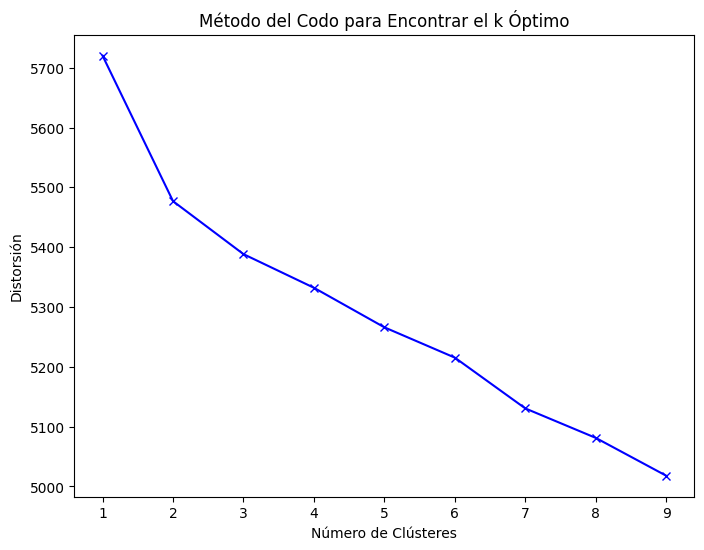

In [60]:
# Estandarizar los datos
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Aplicar K-Means a features
k = 3  # Número de clústeres que deseas
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(features_scaled)

# Agregar etiquetas de clúster al dataframe original
grouped_df['cluster'] = kmeans.labels_

# Visualizar el método del codo para saber si elegimos un "k" óptimo
distorsiones = []
K = range(1, 10)
for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(features_scaled)
    distorsiones.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(K, distorsiones, 'bx-')
plt.xlabel('Número de Clústeres')
plt.ylabel('Distorsión')
plt.title('Método del Codo para Encontrar el k Óptimo')
plt.show()

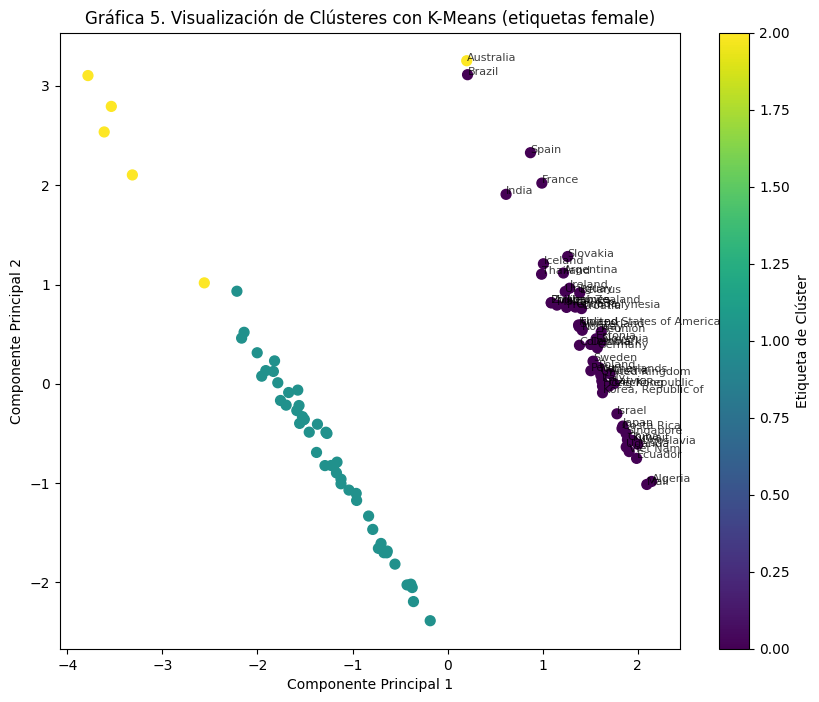

In [63]:
# Queremos visualizar nuestros grupos, para ello aplicaremos un análisis de PCA para visualizarlo en 2 dimensiones.
# Primero visualizamos a las mujeres

# Reducir a 2 dimensiones con PCA para visualización
pca = PCA(n_components=2)
features_pca = pca.fit_transform(features_scaled)

# Crear un gráfico de dispersión con los clústeres
plt.figure(figsize=(10, 8))
plt.scatter(features_pca[:, 0], features_pca[:, 1], c=grouped_df['cluster'], cmap='viridis', s=50)
plt.colorbar(label='Etiqueta de Clúster')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Gráfica 5. Visualización de Clústeres con K-Means (etiquetas female)')

# Agregar etiquetas para los puntos donde el género es "female"
for i in range(len(grouped_df)):
    if grouped_df.iloc[i]['gender'] == 'female':  # Asegúrate de que 'género' es el nombre correcto de la columna
        plt.annotate(grouped_df.iloc[i]['country'], (features_pca[i, 0], features_pca[i, 1]), fontsize=8, alpha=0.75)

plt.show()

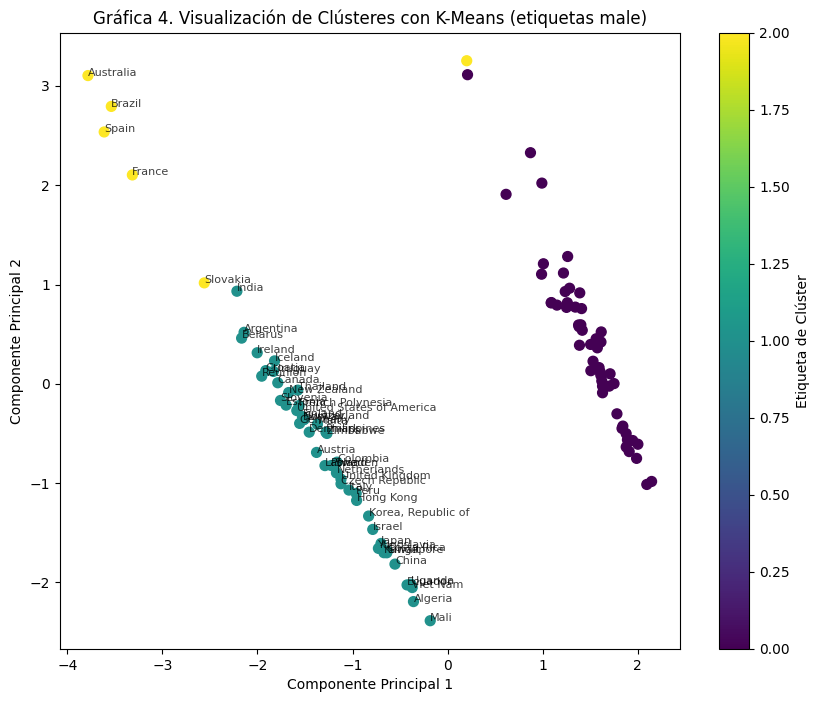

In [66]:
# Mismo procedimiento para hombres

# Reducir a 2 dimensiones con PCA para visualización
pca = PCA(n_components=2)
features_pca = pca.fit_transform(features_scaled)

# Crear un gráfico de dispersión con los clústeres
plt.figure(figsize=(10, 8))
plt.scatter(features_pca[:, 0], features_pca[:, 1], c=grouped_df['cluster'], cmap='viridis', s=50)
plt.colorbar(label='Etiqueta de Clúster')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Gráfica 4. Visualización de Clústeres con K-Means (etiquetas male)')

# Agregar etiquetas para los puntos donde el género es "male"
for i in range(len(grouped_df)):
    if grouped_df.iloc[i]['gender'] == 'male':  # Asegúrate de que 'género' es el nombre correcto de la columna
        plt.annotate(grouped_df.iloc[i]['country'], (features_pca[i, 0], features_pca[i, 1]), fontsize=8, alpha=0.75)

plt.show()